In [136]:
# Importando a biblioteca para manipulação de imagens
from PIL import Image
# Importando a biblioteca para reconhecimento de texto em LaTeX a partir de imagens
from pix2tex.cli import LatexOCR

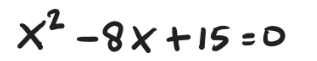

In [137]:
# Abrindo a imagem que contém a equação
img = Image.open('C:\\UTFPR\\24_1\\math_solver\\data\\eq10.png')
img

In [138]:
# Criando uma instância do modelo OCR para LaTeX
model = LatexOCR()
model

In [139]:
# Convertendo a imagem para texto em LaTeX usando o modelo OCR
latex_from_image = model(img)
filtered_latex = latex_from_image
latex_from_image


'\\scriptstyle{x^{2}-9\\,X+i S\\cdot6}'

In [140]:
# Trata casos de existência de igualdade sem valor
latex_str = latex_from_image.strip()
if "=" in latex_str:
    # Dividir a equação em lado esquerdo e direito
    left, right = latex_str.split("=")
    left = left.strip()
    right = right.strip()
    if not left and not right:
        raise("Não tem equação")
    if not left:
        filtered_latex = right
    elif not right:
        filtered_latex = left
    else:
        filtered_latex = latex_from_image
filtered_latex

'\\scriptstyle{x^{2}-9\\,X+i S\\cdot6}'

In [141]:
# Importando a biblioteca para manipulação de expressões matemáticas
import sympy as sp

In [142]:
from latex2sympy2 import latex2sympy

In [143]:
expressao_sympy = latex2sympy(filtered_latex)
# expressao_sympy = latex2sympy('(x+2)(x-5)=x^{2}-2x-15')
print(expressao_sympy)

Exception: I don't understand this
\scriptstyle{x^{2}-9 X+i S\cdot6}
^

In [ ]:
def solve_equation(equation):
    # Detectar o caso baseado no conteúdo da equação
    if isinstance(equation, list):
        left_expr = equation[0].lhs
        right_expr = equation[0].rhs
    else:
        if "=" in str(equation):
            left_expr = equation.lhs
            right_expr = equation.rhs
        else:
            left_expr = equation
            right_expr = sp.S.Zero

    # Tentar converter as expressões para símbolos
    try:
        left_expr = sp.sympify(left_expr)
        right_expr = sp.sympify(right_expr)
    except sp.SympifyError:
        return "Equação inválida"

    # Caso 1: equação apenas numérica
    if left_expr.is_number and right_expr.is_number:
        result = left_expr - right_expr
        return result.evalf()  # Usar evalf() para obter o valor numérico

    # Caso 2 e 3: equações com variáveis
    variables = list(left_expr.free_symbols | right_expr.free_symbols)

    # Resolver a equação usando solve
    solutions = sp.solve(left_expr - right_expr, variables)

    # Melhorar a legibilidade das soluções
    numeric_solutions = [sol.evalf() for sol in solutions]
    
    return numeric_solutions

In [ ]:
solucao = solve_equation(expressao_sympy)
solucao

[5.00000000000000]